# Lab 1. Entanglement, and Teleportation


In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram

<div class="alert alert-block alert-success">

**Readme**  
    
There are 9 exercises (marked in Green) in total in this Jupyter notebook. These questions will give you your first approach at building quantum circuits and thinking on how to make a quantum system do what you want. Additionally, there are some questions about quantum information.
    
The exercises are very straightforward, with solutions in one or two lines. Feel free to ask your mentors and discss with your classmates.
    
At the end of the exercises, there is an **Open Challenge**, where you can try to work out a solution as much as you can. Submit your Jupyter Notebook to juansantos.suarez@usc.es by Wednesday midnight to compete for a winner prize sponsored by IBM Quantum.
    
</div>

## State Preparation

We will start this lab by getting familiar with how to create some quantum circuits using Qiskit.

First, we will create an equal superposition on $N$ qubits. Remember that the equal superposition is easy to produce by aplying a Hadamard gate.
$$|+\rangle = H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right),$$

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$$

<div class="alert alert-block alert-success">

**Exercise 1. Building an equal superposition**  
Build a circuit that creates an equal superposition of N qubits

</div>

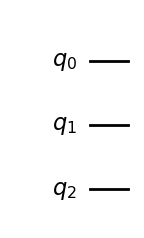

In [2]:
n = 3

plus = QuantumCircuit(n)
##### ==================================
# Write your solution in here.


##### ==================================
plus.draw('mpl')

And now you can check that you get the correct result by simulating the statevector.

In [3]:
# Let's see the result
Statevector(plus).draw('latex')

# This is a very easy way to see the result but of course you cannot access the full state vector in a real experiment
# and it gets reaally messy when you increase the number of qubits. Try to put N=5 or N=6 and you'll see.

# Notice that this writes the vector using qiskit notation which is |q2q1q0> while it's more common to write
# |q0q1q2>. But it's just a matter of notation.

<IPython.core.display.Latex object>

Or doing it the realistic way, that would require to add measurements.

In [ ]:
plus_measure = plus.copy()
plus_measure.measure_all()
plus_measure.draw('mpl')

In [ ]:
# Execute the circuit a finite number of times to get the results.
nshots = 1000
result = AerSimulator().run(plus_measure, shots=nshots).result()
counts = result.get_counts(plus_measure)

plot_histogram(counts)

Qiskit offers many other tools for visualization such as plotting the states in the Bloch Sphere. More info [here](https://qiskit.org/documentation/apidoc/visualization.html).

### Bell states

During the lecture on Quantum Teleportation we made use of the Bell State
$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right),$$
which was prepared using the following circuit


In [ ]:
phi_plus = QuantumCircuit(2)
phi_plus.h(0)
phi_plus.cnot(0, 1)
phi_plus.draw('mpl')

In [ ]:
# Let's see the result
Statevector(phi_plus).draw('latex')

However, we have not seen how are the circuits that prepare the rest of Bell States

$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right),$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right),$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right).$$

As a little warm-up, you will have to create the circuits that prepare these states.

<div class="alert alert-block alert-success">

**Exercise 2. Build a circuit that prepares the state $|\phi^-\rangle$**  
    
It might be useful to remember some gates that were used in the former exercises, in particular
    
$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$
    
</div>

In [ ]:
phi_minus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.



##### ==================================

phi_minus.draw('mpl')

In [ ]:
# Let's see the result
Statevector(phi_minus).draw('latex')

<div class="alert alert-block alert-success">
    
**Exercise 3. Build a circuit that prepares the state $|\psi^+\rangle$**  
    
</div>

In [ ]:
psi_plus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.



##### ==================================

psi_plus.draw('mpl')

In [ ]:
# Let's see the result
Statevector(psi_plus).draw('latex')

<div class="alert alert-block alert-success">
    
**Exercise 4. Build a circuit that prepares the state $|\psi^-\rangle$**  
    
</div>

In [ ]:
psi_minus = QuantumCircuit(2)

##### ==================================
# Write your solution in here.





##### ==================================

psi_minus.draw('mpl')

In [ ]:
# Let's see the result
Statevector(psi_minus).draw('latex')

These type of maximally entangled states can be generalized to systems with $n$ qubits, which are then called the Greenberger–Horne–Zeilinger (GHZ) states.
$$|\text{GHZ}\rangle_n = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n}\right).$$

Naturally, this family of states are also used in some quantum communication protocols such as the [quantum Byzantine agreement](https://en.wikipedia.org/wiki/Quantum_Byzantine_agreement). Although we are using the subscript $n$, it is quite standard in the literature not to use the subscript and just assume that $\text{GHZ}$ refers to $n=3$

<div class="alert alert-block alert-success">

**Exercise 5. Build a circuit that prepares the state $|\text{GHZ}\rangle_3$**

$$|\text{GHZ}\rangle_3 = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right)$$

In [ ]:
GHZ = QuantumCircuit(3)

##### ==================================
# Write your solution in here.



##### ==================================

GHZ.draw('mpl')

In [ ]:
Statevector(GHZ).draw('latex')

Of course entangled states can take many different forms. For instance consider a $3$ qubit state that has an even number of ones
$$|\text{Even}\rangle = c_{00}|000\rangle + c_{01}|101\rangle + c_{10}|110\rangle + c_{11}|011\rangle.$$

If we ignore the first qubit, the state in the other qubits could be non entangled depending on the values of $c_{ij}$. In particular, if we set $c_{ij} = \frac{1}{2}$ we would have an equal superposition state in the last two qubits

$$|++\rangle = \frac{1}{2} \left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right),$$

that is, a product state $|++\rangle = \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)\otimes \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)$. But if we add a first qubit that sets the parity,

$$|\text{Even}\rangle_{++} = \frac{1}{2}\left(|000\rangle + |101\rangle + |110\rangle + |011\rangle\right),$$

this product state structure is lost. Additionally, if any of the qubits were to be measured, it is guaranteed that the other pair of qubits is in the state $|\phi^+\rangle$ if $0$ is measured or $|\psi^+\rangle$ if $1$ is measured.

Even if this might seem very trivial, it can be important for real physical systems. Two good examples of the usefulness of this approach are that ground states of some physical systems can have a fixed parity or that this is taken into account in order to implement time evolution operators $e^{-iHt}$ (Nielsen and Chuang section 4.7.3)

<div class="alert alert-block alert-success">

**Exercise 6. Build a circuit that prepares the even uniform superposition state.**
    
$$|\text{Even}\rangle_{++} = \frac{1}{2}\left(|000\rangle + |101\rangle + |110\rangle + |011\rangle\right).$$
    
</div>

In [ ]:
Even = QuantumCircuit(3)

##### ==================================
# Write your solution in here.




##### ==================================

Even.draw('mpl')

In [ ]:
Statevector(Even).draw('latex')

<div class="alert alert-block alert-success">

**Exercise 7. Build a circuit that prepares the odd uniform superposition state**
    
$$|\text{Odd}\rangle_{++} = \frac{1}{2}\left(|100\rangle + |001\rangle + |010\rangle + |111\rangle\right).$$
    
</div>

In [ ]:
Odd = QuantumCircuit(3)

##### ==================================
# Write your solution in here.






##### ==================================
Odd.draw('mpl')

In [ ]:
Statevector(Odd).draw('latex')

## Quantum Teleportation

<div class="alert alert-block alert-success">
    
**Exercise 8. Can you teleport entanglement? (1pt)**

What would happen if, in the teleportation protocol, the state that Alice wants to teleport was entangled to another qubit? Does the entanglement get teleported?
    

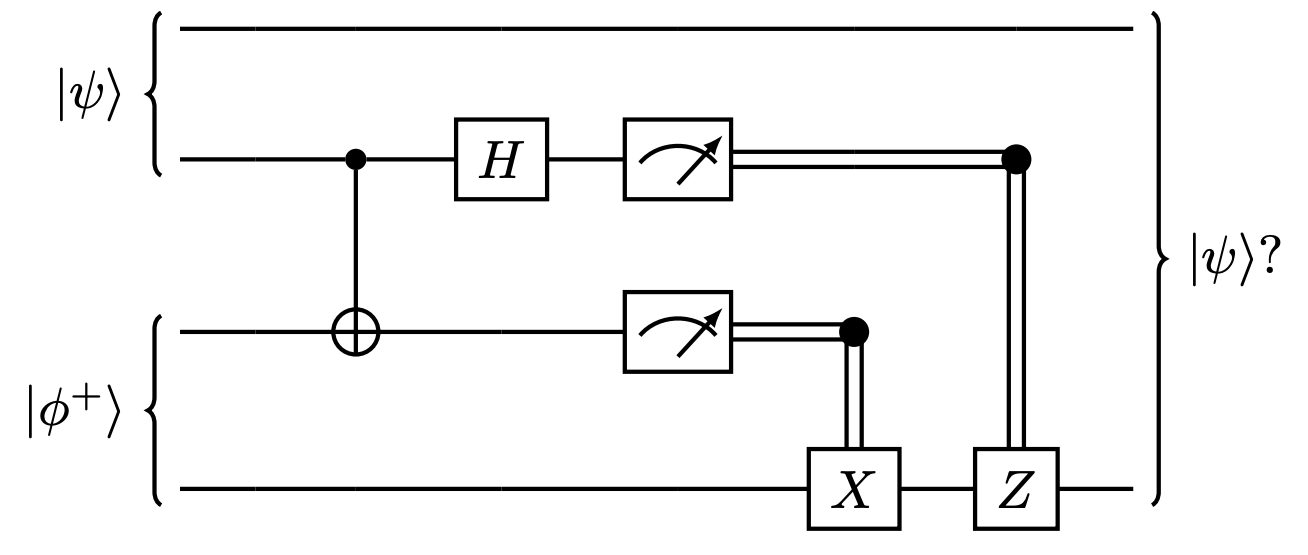
You can solve this however you want (with code or with paper). You can consider a simple example such as $|\psi\rangle=|\phi^+\rangle$.
</div>

In [ ]:
# Create 4 quantum registers
qr  = QuantumRegister(4, name="q")

# Create classical registers
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

out = ClassicalRegister(2) #Measure the state that is supposed to have been teleported in these cubits

qc = QuantumCircuit(qr, crz, crx, out)
##### ==================================
# Write your solution in here.

# Just replicate the structure of the circuit above and at the end measure the first and last qubits into the register "out"



##### ==================================

In [ ]:
qc.draw('mpl')

In [ ]:
# Simulate the circuit
result = AerSimulator().run(qc).result()
counts.get_counts() # The first two bits are the ones corresponding to the last classical register

In [ ]:
Can_entanglement_be_teleported =  #Write True or False :D

Consider once again our well known Bell state

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$$

Alice wants to send a binary message $01110101...$ to Bob, so they share as many Bell pairs as bits they want to share. They agree that when Alice wants to send a $0$, she will measure in the $Z$ basis while if she wants to send a $1$ she will measure in the $X$ basis. By doing this, the wave function will instantly collapse to an eigenstate of $Z$ or $X$ no matter how far Bob is. Can he get the message by performing a single measurement for each of the bits?

<div class="alert alert-block alert-success">
    
**Exercise 9. Can Bob get the message? (1pt)**

Justify why this protocol doesn't allow Bob to recover the original message if he cannot make copies of the state. Additionally, implement this situation using qiskit.
    
Note: Measurements in the $Z$ basis are standard measurements, that are done with the method qc.measure(quantumbit, classicalbit). Measurements in the $X$ basis can be implemented in the same way but adding a Hadamard gate before the measurement. This is because the Hadamard gate is a change of basis from the $Z$ basis to the $X$ basis.
</div>

WRITE YOUR SOLUTION HERE

In [ ]:
# Build a Quantum Circuit
qc = QuantumCircuit(2, 2)
# Create a bell state
qc.h(0)
qc.cnot(0, 1)

# For simplicity, try to send just one bit of information
message = '0'

##### ==================================
# Write your solution in here.

if message == '0':
    # Alice measures in the Z basis

if message =='1':
    # Alice measures in the X basis


qc.barrier()

# Bob measures


##### ==================================

qc.draw('mpl')

In [ ]:
# Execute the circuit a finite number of times to get the results.
nshots = 1000
result = AerSimulator().run(qc, shots=nshots).result()
counts = result.get_counts(qc)

plot_histogram(counts)
# If Bob gets a message, he should be measuring message with probability 1

## Open Challenge

<div class="alert alert-block alert-success">
In this section there are some more challenging exercises that require more work but are also more stimulating. While I believe these exercises have an optimal solution and cannot be arbitrarily improved it is ok to get a suboptimal solution.

Do your best and submit to juansantos.suarez@usc.es by midnight today to have a chance of winning a prize sponsored by IBM Quantum.
    
</div>

### Depth of circuits

Quantum states are delicate, it is difficult to mantain them for long periods of time. This is a very limiting factor in real quantum computing aplications; any calculation that you want to do using your quantum computer has to be done before the state loses its coherence. In this context, one can define the depth of a circuit as the minimum number of layers of operations that circuit contains.

Let's see some examples.

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)

print('Depth:', qc.depth())
qc.draw('mpl')

This circuit has depth 1, as there is only one operation to perform.

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

print('Depth:', qc.depth())
qc.draw('mpl')

This circuit also has depth 1, because operations in different qubits can be performed simultaneously.

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0, 1)
qc.h(1)

print('Depth:', qc.depth())
qc.draw('mpl')

And this one has depth 3 because you have to do the cnot before the second hadamard gate.

Roughly speaking, for a quantum circuit to run succesfully in a real quantum computer that takes $t$ seconds to apply a gate and can mantain quantum states for $\tau$ seconds, the maximum depth of the circuit would be

$$
\tau = d\cdot t \rightarrow d = \frac{\tau}{t}
$$

Larger circuits would yield wrong results as their quantum states would break before all the operations are done.

Of course this is just a simplification and in general, it is way more complex i.e different qubits have different decoherence times and take different times to implement different gates, but it is sufficient to understand that it is quite important to try to minimize the depth of the circuits to be run.

<div class="alert alert-block alert-success">

**(Open Challenge) Reduce the depth needed to create a $|\text{GHZ}\rangle_n$ circuit**  
    
Try to create a $|\text{GHZ}\rangle_n$ circuit for arbitrarily large $n$. How does your circuit increase in depth with $n$? Can you find the optimal way to build the circuit to reduce the depth as much as possible?

</div>

In [ ]:
n = 32
qc = QuantumCircuit(n)

##### ==================================
# Write your solution in here.




##### ==================================

In [ ]:
qc.draw('mpl')

<div class="alert alert-block alert-success">

**(Open Challenge) Reduce the depth needed to create a $|\text{GHZ}\rangle_n$ circuit**  
    
Now imagine that your real quantum computer only allows you to use cnot between nearest neighbours and next nearest neighbours, that is, qubit $i$ can only have cnots involving qubits $i-2$, $i-1$, $i+1$ and $i+2$.

How much can you reduce the depth in this case?
    
At last, try to find the minimal depth for producing a GHZ state in odd qubits but you can only use cnots between nearest neighbours.
</div>

In [ ]:
n = 32
qc = QuantumCircuit(n)

##### ==================================
# Write your solution in here.
'''
I didn't try
'''
##### ==================================